<a href="https://colab.research.google.com/github/ptuan5/jovian-classical-ml/blob/main/machine_learning_tuan_nguyen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Key Indicators of Heart Diseases

# **Background**

Cardiovascular diseases are the leading cause of mortality. More than 80% of the deaths are due to heart attacks and stroke [[1]](https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1), which are sudden and acute. Treatments of such diseases can also be costly, and early diagnosis and treatment of risk factors can greatly improve the healthcare quality.

<center>
<img alt="heart-screenings-are-necessary" src="https://share-cdn-prod.azureedge.net/wp-content/uploads/2021/05/3393_HBEAT520824_heart_screening_tw.png" width="500"/>
</center>







# **The Dataset**

The Behavioral Risk Factor Surveillance System (BRFSS) of the United States conducts annual telephone surveys to collect its citizens' health-related information [[2]](https://www.cdc.gov/brfss/annual_data/annual_2020.html). This dataset originates from the 2020 survey and is cleaned by Kamyl Pytlak on Kaggle to keep relevant attributes and entries [[3]](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease).

Install and import required libraries


In [1]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset_url = "https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease"

In [4]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tuannguyen1505
Your Kaggle Key: ··········


100%|██████████| 3.13M/3.13M [00:00<00:00, 190MB/s]

In [5]:
data_dir = 'personal-key-indicators-of-heart-disease'

In [6]:
!ls -l {data_dir}

total 24600
-rw-r--r-- 1 root root 25189554 May  1 00:34 heart_2020_cleaned.csv


There is only 1 dataset which is not too large (about 25Mb), so we can load the entire df into a dataframe.

In [7]:
all_df = pd.read_csv(data_dir + '/heart_2020_cleaned.csv')

In [8]:
all_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [9]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

There are about 320k entries and 18 columns. The dataset contains numeric, and categorical columns (most of which are binary). There is no missing value (as this dataset is already cleaned).

## Exploratory Data Analysis


In [10]:
all_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


There are 4 numerical values, with a reasonable median. The minimum and maximum values for each of them are technically possible, but BMI of 12 or under can be life-threating, and nobody should sleep on average 24 hours/day. So, it may worth looking at the distribution of these variables to check whether it can be a misentry.

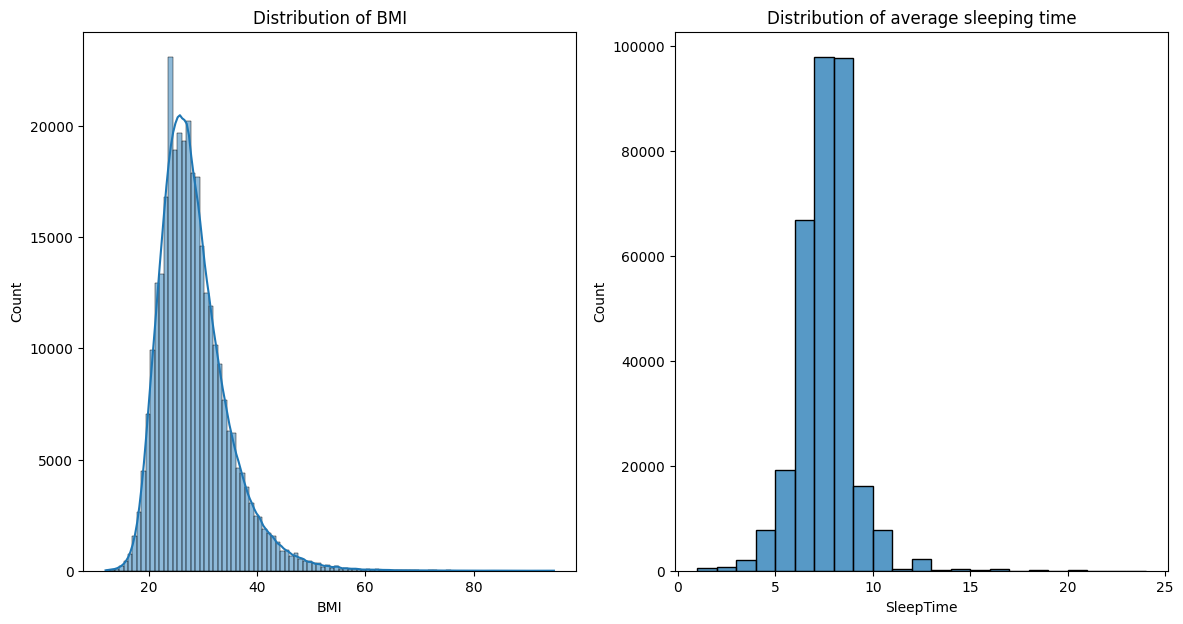

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (14, 7))

sns.histplot(data = all_df, x = "BMI", bins = 100, kde = True, ax = axes[0]);
axes[0].set_title('Distribution of BMI');
sns.histplot(data = all_df, x = "SleepTime", binwidth = 1, ax = axes[1]);
axes[1].set_title('Distribution of average sleeping time');


In [12]:
sum(all_df.SleepTime >= 20)

108

The distribution of BMI is quite smooth without any odd peaks, so I don't think there's a good enough reason to exclude any entries based on BMI. However, I will exclude entries where daily sleep time is 20 hours or more, because these few entries are very strange.

In [13]:
all_df = all_df[all_df.SleepTime < 20]

In [14]:
all_df.describe(include = 'object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319687,319687,319687,319687,319687,319687,319687,319687,319687,319687,319687,319687,319687,319687
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292339,187829,297919,307637,275327,167748,34140,245167,269584,247909,113845,276834,307921,289881


The vast majority of categorical attributes are binary. Some values are ordinal (Age Category and General Health).

One problem is that the dataset is heavily biased in many attributes, including the explanatory variable (HeartDisease). While it is a great fact that the general population have positive health conditions, it may make the machine learning prediction less accurate.

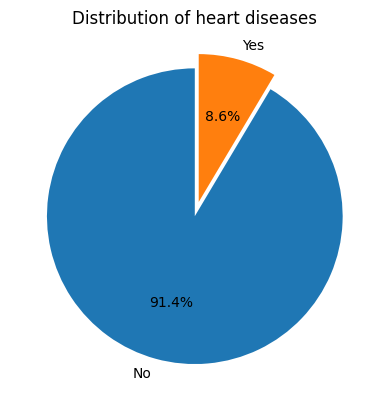

In [15]:
plt.pie(all_df.HeartDisease.value_counts(), explode = (0, 0.1), labels=['No', 'Yes'], autopct='%1.1f%%',
        shadow=False, startangle=90);
plt.title("Distribution of heart diseases");

## Prepare Data for Modeling

Split into 3 subsets with 3:1:1 ratio.


In [16]:
from sklearn.model_selection import train_test_split, KFold

In [17]:
train_val_df, test_df = train_test_split(all_df, test_size=0.2, random_state=15)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=15)

In [18]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (191811, 18)
val_df.shape : (63938, 18)
test_df.shape : (63938, 18)


Choose input and output columns

In [19]:
# Using all columns as inputs
input_cols = list(all_df.columns)[1:]
target_col = 'HeartDisease'

In [20]:
# create the input and target dataframe for each set
train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_col].copy()
test_inputs, test_targets = test_df[input_cols].copy(), test_df[target_col].copy()

# **Hardcore Model & Evaluation Criteria**

In [21]:
from sklearn.metrics import accuracy_score, fbeta_score, average_precision_score

This model will always predict that there is no heart disease.

In [22]:
# Hardcore model
class AllNo:
  def fit(self, inputs, target):
    self.pred = 'No'
  def predict(self, inputs):
    return np.full(inputs.shape[0], 'No')
  def predict_proba(self, inputs):
    proba = np.full((inputs.shape[0], 2), 0)
    proba[:,0] = 1
    return proba

In [23]:
accuracy_score(test_targets, AllNo().predict(test_inputs))

0.9127905158121931

The model already achieves an accuracy score of 91%, which is expected because the majority of the survey population do not have heart diseases.

However, *accuracy* alone is not always the best indicator for a medical test. In the case of heart diseases, a false negative is much more dangerous than a false positive, so *sensitivy* (or *recall*) can be more important than *specificity* or *accuracy* for this model. 

As we care more about the minority class in this case, [[4]](https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/) I will chose the *Precision-Recall Area Under the Curve* (**PR AUC**) as the evaluation metric.

In [24]:
def evaluate_model(real_val, inputs, model, return_score = False):
  # Turn real values into binaries
  real_targets = (real_val == 'Yes')

  # Predict probabilities
  prob_targets = model.predict_proba(inputs)[:,1] # Probability that the model predict "Yes"
  pr_auc = average_precision_score(real_targets, prob_targets)

  if return_score:
    return pr_auc
  else:
    print("PR AUC:", pr_auc)

In [25]:
evaluate_model(test_targets, test_inputs, AllNo())

PR AUC: 0.08720948418780694


The model's PR AUC is very low (only about 0.09). 

In addition, I will create a second baseline model, which will randomly assign a case into Yes/No.

In [84]:
# Hardcore model 2
class RandomGuess():
  def fit(self, inputs, target):
    return self
  def predict(self, inputs):
    return np.random.choice(['No', 'Yes'], inputs.shape[0])
  def predict_proba(self, inputs):
    proba = np.empty((inputs.shape[0], 2))
    proba[:,0] = np.random.rand(proba.shape[0])
    proba[:,1] = 1 - proba[:,0]
    return proba

In [85]:
evaluate_model(test_targets, test_inputs, RandomGuess())

PR AUC: 0.0879354513986732


The also has a similar PR AUC, which is about 0.09. 

# **Preprocess Data**

## Scale numeric data

In [28]:
from sklearn.preprocessing import RobustScaler

In [29]:
# Identify numeric and categorical columns
numeric_cols = list(all_df[input_cols].select_dtypes('float64').columns)
object_cols = list(all_df[input_cols].select_dtypes('object').columns)


In [30]:
scaler = RobustScaler().fit(all_df[numeric_cols])
scaled_cols = [col + '_scaled' for col in numeric_cols]

In [31]:
train_inputs[scaled_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[scaled_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[scaled_cols] = scaler.transform(test_inputs[numeric_cols])

In [32]:
train_inputs[scaled_cols].describe()

,BMI_scaled,PhysicalHealth_scaled,MentalHealth_scaled,SleepTime_scaled
count,191811.000000,191811.000000,191811.000000,191811.000000
mean,0.136603,1.681992,1.298836,0.045795
std,0.860823,3.970087,2.649119,0.705687
min,-2.070365,0.000000,0.000000,-3.000000
25%,-0.445196,0.000000,0.000000,-0.500000
50%,0.002706,0.000000,0.000000,0.000000
75%,0.560217,1.000000,1.000000,0.500000
max,9.112314,15.000000,10.000000,6.000000


## Encode categorical data


In [33]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [34]:
# The ordinal and categorical columns
ordinal_cols = ['AgeCategory','GenHealth']
categorical_cols = [x for x in object_cols if x not in ordinal_cols] #non-ordinal

In [35]:
def encode(df_inputs, get_encoded_cols = False, categorical_cols = categorical_cols, ordinal_cols = ordinal_cols):
  
  ordinal_encoder = OrdinalEncoder(categories = [['18-24', '25-29', '30-34', '35-39', '40-44', '45-49','50-54',
                                                '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'],
                                               ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']]).fit(df_inputs[ordinal_cols])
                                              
  category_encoder = OneHotEncoder(sparse_output=False,drop='if_binary').fit(df_inputs[categorical_cols])

  category_encoded_cols = list(category_encoder.get_feature_names_out(categorical_cols))
  ordinal_encoded_cols = [col + '_code' for col in ordinal_cols]
  encoded_cols = category_encoded_cols + ordinal_encoded_cols

  if get_encoded_cols:
    return encoded_cols
  else:
    df_inputs[category_encoded_cols] = category_encoder.transform(df_inputs[categorical_cols])
    df_inputs[ordinal_encoded_cols] = ordinal_encoder.transform(df_inputs[ordinal_cols])
    
    return df_inputs

In [36]:
encoded_cols = encode(test_inputs, get_encoded_cols = True)

In [37]:
train_inputs = encode(train_inputs)
val_inputs = encode(val_inputs)
test_inputs = encode(test_inputs)

In [38]:
# Extract columns for training
X_train = train_inputs[scaled_cols + encoded_cols]
X_val = val_inputs[scaled_cols + encoded_cols]
X_test = test_inputs[scaled_cols + encoded_cols]

# **Train Different Models**

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logReg_model = LogisticRegression(solver = 'liblinear')

In [41]:
logReg_model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [42]:
evaluate_model(train_targets, X_train, logReg_model)

PR AUC: 0.3504144034423903


In [43]:
evaluate_model(val_targets, X_val, logReg_model)

PR AUC: 0.34183332587949555


The logistic regression models improves the PR AUC significantly.

## Decision Tree & Random Forest

Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
tree_model = DecisionTreeClassifier(random_state=15)

In [46]:
tree_model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=15)

In [47]:
# train_preds_tree = tree_model.predict(X_train)
evaluate_model(train_targets, X_train, tree_model)

PR AUC: 0.9992830444532398


In [48]:
#val_preds_tree = tree_model.predict(val_inputs[scaled_cols + encoded_cols])
evaluate_model(val_targets, X_val, tree_model)

PR AUC: 0.12308064457689424


Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
randForest_model = RandomForestClassifier(random_state=15)

In [51]:
randForest_model.fit(X_train, train_targets)

RandomForestClassifier(random_state=15)

In [52]:
# train_preds_randf = randForest_model.predict(X_train)
evaluate_model(train_targets, X_train, randForest_model)

PR AUC: 0.9989635828523831


In [53]:
# val_preds_randf = randForest_model.predict(X_val)
evaluate_model(val_targets, X_val, randForest_model)

PR AUC: 0.2507589493003698


Decision tree and random forest both overfitted the training sets. But on the validation datasets, their performances are not better than the logistic model.

## Gradient Boosting Machines (GBM)

In [54]:
from xgboost import XGBClassifier

In [55]:
gbm_model = XGBClassifier(objective = 'binary:logistic', eval_metric = 'error', random_state = 15)

In [56]:
target_codes = {'No': 0, 'Yes': 1}
inv_codes = {0: 'No', 1: 'Yes'}

In [57]:
gbm_model.fit(X_train, train_targets.map(target_codes))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=15, ...)

In [58]:
evaluate_model(train_targets, X_train, gbm_model)

PR AUC: 0.4599332153599395


In [59]:
# val_preds_gbm = gbm_model.predict(X_val)
evaluate_model(val_targets, X_val, gbm_model)

PR AUC: 0.3292554334154853


On the validation dataset, GBM has slightly poorer performances than the logistic regression model.

# **Imbalanced Learning**

## Data Sampling

Because the data is heavily imbalanced, I utilize some sampling algorithms to try improving the learning process.

In [60]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

In [61]:
X_over, targets_over = SMOTE(random_state=15, sampling_strategy = 0.3).fit_resample(X_train, train_targets)

In [62]:
X_under, targets_under = TomekLinks().fit_resample(X_train, train_targets)

In [63]:
X_combined, targets_combined = SMOTETomek(random_state=15, sampling_strategy = 0.2).fit_resample(X_train, train_targets)

In [64]:
print("Original training set has", X_train.shape[0], "samples")
print("Oversampling training set has", X_over.shape[0], "samples")
print("Undersampling training set has", X_under.shape[0], "samples")
print("Combined over and undersampling training set has", X_combined.shape[0], "samples")

Original training set has 191811 samples
Oversampling training set has 228023 samples
Undersampling training set has 186611 samples
Combined over and undersampling training set has 204059 samples


In [65]:
over_score = evaluate_model(val_targets, X_val, LogisticRegression(max_iter = 500).fit(X_over, targets_over), return_score = True)
under_score = evaluate_model(val_targets, X_val, LogisticRegression(max_iter = 500).fit(X_under, targets_under), return_score = True)
combined_score = evaluate_model(val_targets, X_val, LogisticRegression(max_iter = 500).fit(X_combined, targets_combined), return_score = True)

In [66]:
print("The PR AUC for validation:")
print("Oversampling:", over_score)
print("Undersampling:", under_score)
print("Combine oversampling and undersampling:", combined_score)

The PR AUC for validation:
Oversampling: 0.3394323890360287
Undersampling: 0.3417866976872843
Combine oversampling and undersampling: 0.34091484549637874


Resampling the training set doesn't affect the PR AUC on the validation model very much. I will use the original set for hyperparameter tuning.

# **Tune Hyperparameters** 

I will tune the **logistic regression model** because so far it has the highest PR AUC. While GBM provides comparable AUC, logistic regression is more interpretable, so the model can also be useful for finding explanations.

I will tune 2 hyperparameters: solver and regularization strength.

In [67]:
best_params = {'random_state':15, 'max_iter': 500}

In [68]:
def test_params(param_name, param_values, Model, **other_params):
  train_pr_scores, val_pr_scores = [], []
  for value in param_values:
    params = dict(other_params)
    params[param_name] = value

    if Model == XGBClassifier:
      model = Model(**params).fit(X_train, train_targets.map(target_codes))
    else:
      model = Model(**params).fit(X_train, train_targets)
    
    train_pr_auc = evaluate_model(train_targets, X_train, model, return_score=True)
    val_pr_auc = evaluate_model(val_targets, X_val, model, return_score=True)

    train_pr_scores.append(train_pr_auc)
    val_pr_scores.append(val_pr_auc)
  
  plt.figure()
  plt.plot(param_values, train_pr_scores, 'b-o')
  plt.plot(param_values, val_pr_scores, 'r-o')
  plt.xlabel(param_name)
  plt.ylabel('Score')
  plt.title('Overfitting curve: ' + param_name)
  plt.legend(['Training', 'Validation'])

## Solver


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


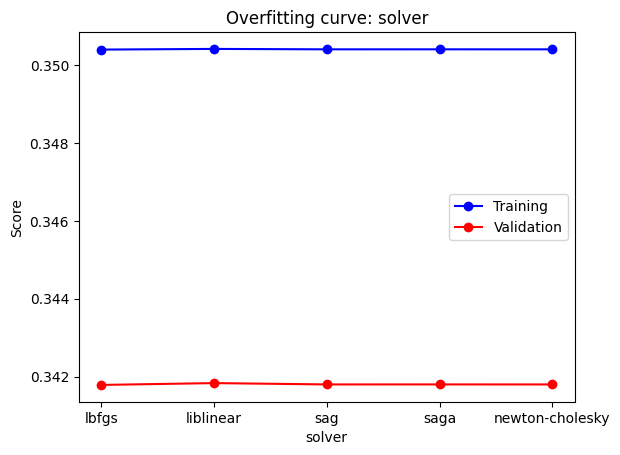

In [69]:
test_params('solver', ['lbfgs', 'liblinear', 'sag', 'saga', 'newton-cholesky'], LogisticRegression, **best_params);

There's no difference between the 5 solvers. I will keep using 'liblinear' for my model.

In [70]:
best_params['solver'] = 'liblinear'

## Regularization Strength

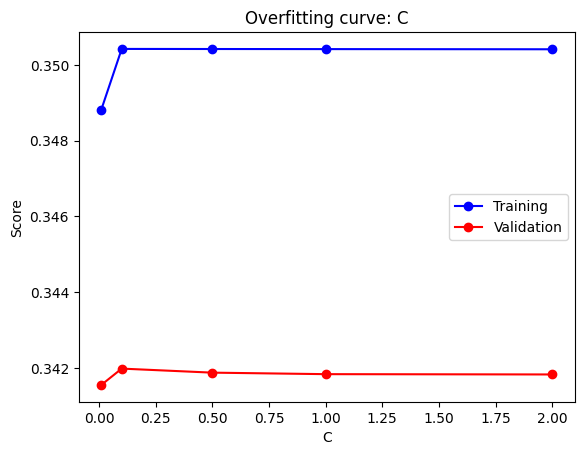

In [71]:
test_params('C', [0.01, 0.1, 0.5, 1, 2], LogisticRegression, **best_params);

I will keep C = 0.1 as it improves the PR AUC scores a little.

In [72]:
best_params['C'] = 0.1

# **Save the model**

In [73]:
import joblib

In [74]:
best_params

{'random_state': 15, 'max_iter': 500, 'solver': 'liblinear', 'C': 0.1}

In [75]:
final_model = LogisticRegression(max_iter = 500, solver = 'liblinear', C = 0.1)
final_model.fit(X_train, train_targets)

LogisticRegression(C=0.1, max_iter=500, solver='liblinear')

Create a dictionary containing all required objects and functions.

In [76]:
heart_indicator = {
    'model': final_model,
    'scaler': scaler,
    'scaled_cols': scaled_cols,
    'encoder': encode,
    'encoded_cols': encoded_cols,
    'input_cols': input_cols,
    'target_col': target_col
}

Save this into a .joblib file

In [77]:
joblib.dump(heart_indicator, 'heart_indicator.joblib')

['heart_indicator.joblib']

# **Conclusion**

In [78]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

Finally, test our model on the test set.

In [79]:
evaluate_model(test_targets, X_test, final_model)

PR AUC: 0.3416984086058009


In [86]:
# Baseline model
baseline_model = RandomGuess().fit(X_train, train_targets)
precision, recall, threshold = precision_recall_curve(test_targets == 'Yes', baseline_model.predict_proba(X_test)[:,0])

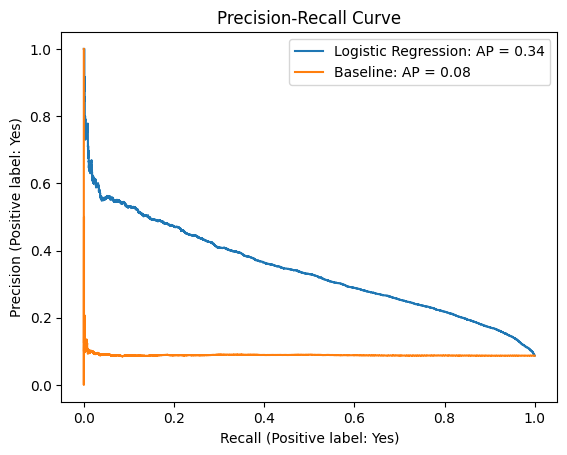

In [87]:
display = PrecisionRecallDisplay.from_estimator(final_model, X_test, test_targets);
_ = display.ax_.set_title("Precision-Recall Curve");
plt.plot(recall, precision);
plt.legend(['Logistic Regression: AP = 0.34', 'Baseline: AP = 0.08']);

The final model has a PR AUC = 0.342, compared to the PR AUC = 0.088 of the baseline model.

Though the final PR AUC is still low, it is an improvement. The main reason for the poor performance is the heavily imbalanced dataset.

# **Reference**


1. Cardiovascular diseases overview: https://www.who.int/health-topics/cardiovascular-diseases
2. CDC original data: https://www.cdc.gov/brfss/annual_data/annual_2020.html
3. The cleaned dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
4. Framework for imbalanced classification project: https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/